# COMPARAÇÃO DE FRETE ENTRE TRANSPORTADORAS

##### IMPORTAR AS BLIBLIOTECAS:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### CRIAR DATAFRAMES:

In [2]:
df1 = pd.read_excel('dados.xls')
df_tr = pd.read_excel('tr.xls')

# 
## DATA FUSION:

##### JUNTAR OS DATAFRAMES PELA COLUNA EM COMUM (NF):

In [3]:
df = pd.merge(df1,df_tr, on='nf')

##### VERIFICAR SE EXISTE ALGUMA COLUNA COM INFORMAÇÃO NULA APÓS O MERGE:

In [4]:
#O ~ é um sinal de negação - "Não é nulo" - o all verifica se todos os resultados são True - Se True - Nenhuma celula tem valor nulo. 
~df.isnull().all()

nf           True
cidade       True
uf           True
valor        True
frete        True
motorista    True
dtype: bool

#
## FEATURE ENGINEERING:

##### CRIAR COLUNA COM VALOR DE PERCENTUAL DE FRETE POR VALOR DE NF:

In [5]:
df['p_frete'] = ((df.frete / df.valor)*100).round(1)

##### CRIAR COLUNA REGIÃO (INTERIOR / CAPITAL / REGIÃO METROPOLITANA):

In [6]:
#Lista de cidades d região metropolitana do RIO:
rm_rio_de_janeiro = ['BELFORD ROXO','DUQUE DE CAXIAS','GUAPIMIRIM','ITABORAÍ','ITAGUAÍ','JAPERI','MAGÉ','MARICA',
    'MESQUITA','NILOPOLIS','NITEROI','NOVA IGUACU','PARACAMBI','PETROPOLIS','QUEIMADOS','RIO BONITO','SAO GONCALO',
    'SAO JOAO DE MERITI','SEROPEDICA','TANGUA']

# Defina a função que retorna os valores para a nova coluna
def classificar_cidade(cidade):
    if cidade == 'RIO DE JANEIRO':
        return 'C'
    elif cidade in rm_rio_de_janeiro:
        return 'RM'
    else:
        return 'I'

# Aplique a função à coluna 'cidade' usando a função apply
df['regiao'] = df['cidade'].apply(classificar_cidade)

##### CRIAR COLUNA FAIXA DE VALOR:
###### 1-0_200 / 2-200_500 / 3-500_1000 / 4-1000_:

In [7]:
# Defina a função que retorna os valores para a nova coluna
def classificar_valor(valor):
    if 0 < valor <200:
        return 1
    elif 200 < valor < 500:
        return 2
    elif 500 < valor < 1000:
        return 3
    else:
        return 4

# Aplique a função à coluna 'cidade' usando a função apply
df['faixa'] = df['valor'].apply(classificar_valor)

#
## OUTLIERS:
###### Nesse caso, existem fretes muito fora da média, porém depende de fatores como local de entrega e valor de NF, por isso deixamos na análise.

##### ANALISE DO VALOR DE FRETE BRUTO:

In [9]:
#bloxplot:  # limites - dados que parecem fazer parte da massa de dados / # outliers - dados estranhos
#print(df.boxplot(column='frete'))
print(f'Média Valor de Frete: R$ {round(df.frete.mean(), 2)}')

Média Valor de Frete: R$ 77.6


##### ANALISE DOS DADOS OUTLIERS:
###### Aplicar um filtro para mostrar os fretes que são muito discrepantes, assim, podemos confirmar e verificar um padrão (ter taxa de difilcudade ou valor de NF alto).

In [10]:
df[df.frete > 250]

,nf,cidade,uf,valor,frete,motorista,p_frete,regiao,faixa
20,4206,ITAGUAI,RJ,528.39,361.4512,TR_2,68.4,I,3
21,4209,ITAGUAI,RJ,575.86,361.6096,TR_2,62.8,I,3
23,4212,SEROPEDICA,RJ,511.31,361.3896,TR_2,70.7,RM,3
27,4454,VOLTA REDONDA,RJ,10694.31,344.5904,TR_1,3.2,I,4
28,4135,VOLTA REDONDA,RJ,1208.88,363.9416,TR_2,30.1,I,4
64,4138,TERESOPOLIS,RJ,1353.77,364.6720,TR_2,26.9,I,4
70,4141,TERESOPOLIS,RJ,1284.31,364.3288,TR_2,28.4,I,4
81,4562,BARRA DO PIRAI,RJ,3730.17,386.1792,TR_2,10.4,I,4
99,4499,SERRA,RJ,6719.30,316.7296,TR_1,4.7,I,4
108,4559,SAO JOAO DE MERITI,RJ,8424.04,396.4752,TR_2,4.7,RM,4


##### ANALISE DO VALOR DE PERCENTUAL DE FRETE:

AxesSubplot(0.125,0.11;0.775x0.77)
Média do % de Frete: 9.12


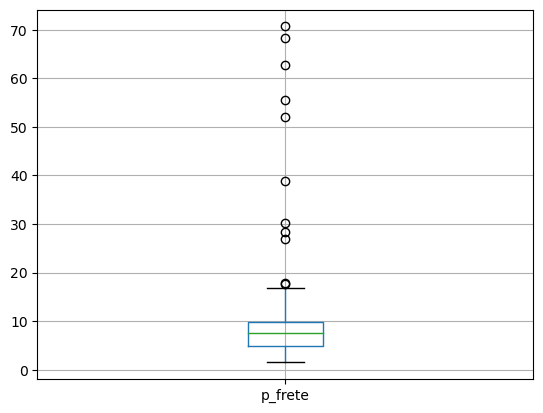

In [11]:
print(df.boxplot(column='p_frete'))
print(f'Média do % de Frete: {round(df.p_frete.mean(), 2)}')

###### A análise por % de frete sobre valor da NF mostra valores menos discrepante.
###### Ao aplicar o filtro podemos observar o mesmo padrão de cidades:

In [12]:
df[df.p_frete > 20]

,nf,cidade,uf,valor,frete,motorista,p_frete,regiao,faixa
20,4206,ITAGUAI,RJ,528.39,361.4512,TR_2,68.4,I,3
21,4209,ITAGUAI,RJ,575.86,361.6096,TR_2,62.8,I,3
23,4212,SEROPEDICA,RJ,511.31,361.3896,TR_2,70.7,RM,3
28,4135,VOLTA REDONDA,RJ,1208.88,363.9416,TR_2,30.1,I,4
64,4138,TERESOPOLIS,RJ,1353.77,364.6720,TR_2,26.9,I,4
70,4141,TERESOPOLIS,RJ,1284.31,364.3288,TR_2,28.4,I,4
157,4127,TERESOPOLIS,RJ,705.50,367.0040,TR_2,52.0,I,3
161,4214,ITAGUAI,RJ,650.48,361.8824,TR_2,55.6,I,3
171,4142,SAO GONCALO,RJ,915.66,355.7048,TR_2,38.8,RM,3


#
## DADOS DUPLICADOS:
##### Na análise, a unica coluna que não pode ter dados duplicados é a coluna NF:

In [13]:
~df.nf.duplicated().all()
#retorna TRUE, nenhuma dado de NF duplicado

True

#
## ANALISE

### GERAL:

##### ESTADO:

In [14]:
print(f'TOTAL DE FATURAMENTO R$: {df.valor.sum().round(2)}')
print(f'TOTAL DE FRETE R$: {df.frete.sum().round(2)}')
print(f'PERCENTUAL DE FRETE SOBRE FATURAMENTO: {((df.frete.sum() / df.valor.sum())*100).round(2)}%\n') 

TOTAL DE FATURAMENTO R$: 269515.11
TOTAL DE FRETE R$: 18079.86
PERCENTUAL DE FRETE SOBRE FATURAMENTO: 6.71%



##### TRANSPORTADORA 1:

In [15]:
#Criar DataFrame para Transportadora 1
df_t1 = df.loc[df.motorista == "TR_1"]
print(f'TOTAL DE FATURAMENTO R$: {df_t1.valor.sum().round(2)}')
print(f'TOTAL DE FRETE R$: {df_t1.frete.sum().round(2)}')
print(f'PERCENTUAL DE FRETE SOBRE FATURAMENTO: {((df_t1.frete.sum() / df_t1.valor.sum())*100).round(2)}%\n') 

TOTAL DE FATURAMENTO R$: 106447.84
TOTAL DE FRETE R$: 5741.85
PERCENTUAL DE FRETE SOBRE FATURAMENTO: 5.39%



##### TRANSPORTADORA 2:

In [16]:
#Criar DataFrame para Transportadora 2
df_t2 = df.loc[df.motorista == "TR_2"]
print(f'TOTAL DE FATURAMENTO R$: {df_t2.valor.sum().round(2)}')
print(f'TOTAL DE FRETE R$: {df_t2.frete.sum().round(2)}')
print(f'PERCENTUAL DE FRETE SOBRE FATURAMENTO: {((df_t2.frete.sum() / df_t2.valor.sum())*100).round(2)}%\n') 

TOTAL DE FATURAMENTO R$: 163067.27
TOTAL DE FRETE R$: 12338.01
PERCENTUAL DE FRETE SOBRE FATURAMENTO: 7.57%



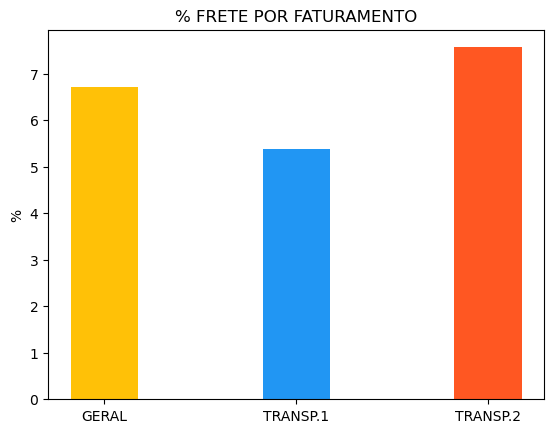

In [17]:
dados = [((df.frete.sum() / df.valor.sum())*100).round(2),
         ((df_t1.frete.sum() / df_t1.valor.sum())*100).round(2),
         ((df_t2.frete.sum() / df_t2.valor.sum())*100).round(2)]
legenda = ['GERAL','TRANSP.1','TRANSP.2']

x = np.arange(len(legenda))
largura = 0.35

cores = ['#FFC107', '#2196F3', '#FF5722'] # lista de cores das barras

plt.bar(x, dados, largura, color=cores)

plt.xticks(x, legenda)
plt.ylabel('%')

plt.title('% FRETE POR FATURAMENTO')

plt.show()

### POR REGIÃO:
##### ESTADO:

In [18]:
total_por_reg = df.groupby('regiao')[['valor', 'frete']].sum()
total_por_reg['frete_reg'] = (total_por_reg['frete'] / total_por_reg['valor'] * 100).round(2)

print("CAPITAL:")
print(f"(% de Notas): {((df[df.regiao == 'C'].count().iloc[0] / df.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg.loc['C']['frete_reg']:.2f}%\n")
print("REGIÃO METROPOLITANA:")
print(f"(% de Notas): {((df[df.regiao == 'RM'].count().iloc[0] / df.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg.loc['RM']['frete_reg']:.2f}%\n")
print("INTERIOR:")
print(f"(% de Notas): {((df[df.regiao == 'I'].count().iloc[0] / df.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg.loc['I']['frete_reg']:.2f}%\n")

CAPITAL:
(% de Notas): 34.0%
(%): 5.35%

REGIÃO METROPOLITANA:
(% de Notas): 21.0%
(%): 7.04%

INTERIOR:
(% de Notas): 45.0%
(%): 7.49%



##### TRANSPORTADORA 1:

In [19]:
total_por_reg1 = df_t1.groupby('regiao')[['valor', 'frete']].sum()
total_por_reg1['frete_reg'] = (total_por_reg1['frete'] / total_por_reg1['valor'] * 100).round(2)

print("CAPITAL:")
print(f"(% de Notas): {((df_t1[df_t1.regiao == 'C'].count().iloc[0] / df_t1.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg1.loc['C']['frete_reg']:.2f}%\n")
print("REGIÃO METROPOLITANA:")
print(f"(% de Notas): {((df_t1[df_t1.regiao == 'RM'].count().iloc[0] / df_t1.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg1.loc['RM']['frete_reg']:.2f}%\n")
print("INTERIOR:")
print(f"(% de Notas): {((df_t1[df_t1.regiao == 'I'].count().iloc[0] / df_t1.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg1.loc['I']['frete_reg']:.2f}%\n")

CAPITAL:
(% de Notas): 24.0%
(%): 6.04%

REGIÃO METROPOLITANA:
(% de Notas): 21.0%
(%): 6.13%

INTERIOR:
(% de Notas): 55.0%
(%): 5.01%



##### TRANSPORTADORA 2:

In [20]:
total_por_reg2 = df_t2.groupby('regiao')[['valor', 'frete']].sum()
total_por_reg2['frete_reg'] = (total_por_reg2['frete'] / total_por_reg2['valor'] * 100).round(2)

print("CAPITAL:")
print(f"(% de Notas): {((df_t2[df_t2.regiao == 'C'].count().iloc[0] / df_t2.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg2.loc['C']['frete_reg']:.2f}%\n")
print("REGIÃO METROPOLITANA:")
print(f"(% de Notas): {((df_t2[df_t2.regiao == 'RM'].count().iloc[0] / df_t2.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg2.loc['RM']['frete_reg']:.2f}%\n")
print("INTERIOR:")
print(f"(% de Notas): {((df_t2[df_t2.regiao == 'I'].count().iloc[0] / df_t2.regiao.count()) * 100).round()}%")
print(f"(%): {total_por_reg2.loc['I']['frete_reg']:.2f}%\n")

CAPITAL:
(% de Notas): 40.0%
(%): 5.14%

REGIÃO METROPOLITANA:
(% de Notas): 21.0%
(%): 7.49%

INTERIOR:
(% de Notas): 39.0%
(%): 10.37%



### POR FAIXA DE PREÇO:
##### ESTADO:

In [21]:
total_por_faixa = df.groupby('faixa')[['valor', 'frete']].sum()
total_por_faixa['percentual_frete'] = (total_por_faixa['frete'] / total_por_faixa['valor'] * 100).round(2)

#print(f"FAIXA 1 (ATÉ R$ 200):")
#print(f"(%): {total_por_faixa.loc[1]['percentual_frete']:.2f}%\n")
print(f"FAIXA 2 (DE R$ 200 ATÉ R$ 500):")
print(f"(% de NFs): {((df[df.faixa == 2].count().iloc[0] / df.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa.loc[2]['percentual_frete']:.2f}%\n")
print(f"FAIXA 3 (DE R$ 500 ATÉ R$ 1000):")
print(f"(% de NFs): {((df[df.faixa == 3].count().iloc[0] / df.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa.loc[3]['percentual_frete']:.2f}%\n")
print(f"FAIXA 4 (ACIMA DE R$ 1000):")
print(f"(% de NFs): {((df[df.faixa == 4].count().iloc[0] / df.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa.loc[4]['percentual_frete']:.2f}%\n")

FAIXA 2 (DE R$ 200 ATÉ R$ 500):
(% de NFs): 12.0%
(%): 13.47%

FAIXA 3 (DE R$ 500 ATÉ R$ 1000):
(% de NFs): 49.0%
(%): 10.45%

FAIXA 4 (ACIMA DE R$ 1000):
(% de NFs): 39.0%
(%): 4.60%



##### TRANSPORTADORA 1:

In [22]:
total_por_faixa1 = df_t1.groupby('faixa')[['valor', 'frete']].sum()
total_por_faixa1['percentual_frete'] = (total_por_faixa1['frete'] / total_por_faixa1['valor'] * 100).round(2)

#print(f"FAIXA 1 (ATÉ R$ 200):")
#print(f"(%): {total_por_faixa.loc[1]['percentual_frete']:.2f}%\n")
print(f"FAIXA 2 (DE R$ 200 ATÉ R$ 500):")
print(f"(% de NFs): {((df_t1[df_t1.faixa == 2].count().iloc[0] / df_t1.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa1.loc[2]['percentual_frete']:.2f}%\n")
print(f"FAIXA 3 (DE R$ 500 ATÉ R$ 1000):")
print(f"(% de NFs): {((df_t1[df_t1.faixa == 3].count().iloc[0] / df_t1.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa1.loc[3]['percentual_frete']:.2f}%\n")
print(f"FAIXA 4 (ACIMA DE R$ 1000):")
print(f"(% de NFs): {((df_t1[df_t1.faixa == 4].count().iloc[0] / df_t1.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa1.loc[4]['percentual_frete']:.2f}%\n")

FAIXA 2 (DE R$ 200 ATÉ R$ 500):
(% de NFs): 8.0%
(%): 11.28%

FAIXA 3 (DE R$ 500 ATÉ R$ 1000):
(% de NFs): 52.0%
(%): 7.25%

FAIXA 4 (ACIMA DE R$ 1000):
(% de NFs): 40.0%
(%): 4.24%



##### TRANSPORTADORA 2:

In [23]:
total_por_faixa2 = df_t2.groupby('faixa')[['valor', 'frete']].sum()
total_por_faixa2['percentual_frete'] = (total_por_faixa2['frete'] / total_por_faixa2['valor'] * 100).round(2)

#print(f"FAIXA 1 (ATÉ R$ 200):")
#print(f"(%): {total_por_faixa.loc[1]['percentual_frete']:.2f}%\n")
print(f"FAIXA 2 (DE R$ 200 ATÉ R$ 500):")
print(f"(% de NFs): {((df_t2[df_t2.faixa == 2].count().iloc[0] / df_t2.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa2.loc[2]['percentual_frete']:.2f}%\n")
print(f"FAIXA 3 (DE R$ 500 ATÉ R$ 1000):")
print(f"(% de NFs): {((df_t2[df_t2.faixa == 3].count().iloc[0] / df_t2.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa2.loc[3]['percentual_frete']:.2f}%\n")
print(f"FAIXA 4 (ACIMA DE R$ 1000):")
print(f"(% de NFs): {((df_t2[df_t2.faixa == 4].count().iloc[0] / df_t2.faixa.count()) * 100).round()}%")
print(f"(%): {total_por_faixa2.loc[4]['percentual_frete']:.2f}%\n")

FAIXA 2 (DE R$ 200 ATÉ R$ 500):
(% de NFs): 15.0%
(%): 14.22%

FAIXA 3 (DE R$ 500 ATÉ R$ 1000):
(% de NFs): 47.0%
(%): 12.83%

FAIXA 4 (ACIMA DE R$ 1000):
(% de NFs): 38.0%
(%): 4.84%

